In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [ ]:
train=pd.read_csv('Data/train.csv')
test=pd.read_csv('Data/test.csv')
sub=pd.read_csv('Data/sample_submission.csv')
train.drop(['id'],axis = 1,inplace = True)

In [3]:
train

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [4]:
train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [5]:
print(train.isnull().sum())
nanlist=[col for col in train.columns if train[col].isnull().any()]
nanlist

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64


['Episode_Length_minutes', 'Guest_Popularity_percentage', 'Number_of_Ads']

In [6]:
print(test.isnull().sum())
testnanlist=[col for col in test.columns if test[col].isnull().any()]
testnanlist

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64


['Episode_Length_minutes', 'Guest_Popularity_percentage']

In [7]:
for col in nanlist:
    train.fillna({col:train[col].mean()}, inplace=True)
    test.fillna({col:test[col].mean()}, inplace=True)

train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [8]:
numlist=[]
objlist=[col for col in test.columns if test[col].dtype == object]


for col in test.columns:
    print(f'{col}:',test[col].dtype)
    if col not in objlist:
        numlist.append(col)

numlist.remove('id')
print(f"\nnumlist:{numlist}\nobjlist:{objlist}")

id: int64
Podcast_Name: object
Episode_Title: object
Episode_Length_minutes: float64
Genre: object
Host_Popularity_percentage: float64
Publication_Day: object
Publication_Time: object
Guest_Popularity_percentage: float64
Number_of_Ads: float64
Episode_Sentiment: object

numlist:['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
objlist:['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


In [9]:
def outliers(df):
    for col in numlist:
        Q1 = test[col].quantile(0.25)
        Q3 = test[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = test[(test[col] < lower_bound) | (test[col] > upper_bound)]

        print(f"{col} outlier values",outliers[col].unique())

outliers(test)
outliers(train)

Episode_Length_minutes outlier values [4.19298741e+02 7.57500000e+03 7.84862640e+07]
Host_Popularity_percentage outlier values []
Guest_Popularity_percentage outlier values []
Number_of_Ads outlier values [  89.12 2063.  ]
Episode_Length_minutes outlier values [4.19298741e+02 7.57500000e+03 7.84862640e+07]
Host_Popularity_percentage outlier values []
Guest_Popularity_percentage outlier values []
Number_of_Ads outlier values [  89.12 2063.  ]


In [10]:
def fixoutlier(df):
    for col in numlist:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        for idx, value in df[col].items():
            if value < lower or value > upper:
                df.loc[idx, col] = np.nan

In [11]:
fixoutlier(test)
fixoutlier(train)

In [12]:
for col in nanlist:
    train.fillna({col:train[col].median()}, inplace=True)
    test.fillna({col:test[col].median()}, inplace=True)

print(train.isnull().sum().sum(),test.isnull().sum().sum())

0 0


In [13]:
for col in train.columns:
    if col in objlist:
        print(train[col].unique())

print('\n#########################################################################################################\n')

for col in test.columns:
    if col in objlist:
        print(test[col].unique())

['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']
['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Episode 86'
 'Episode 19' 'Episode 47' 'Episode 44' 'Episode 32' 'Episode 81'
 'Episode 66' 'Episode 62' 'Episode 76' 'Episode 37' 'Episode 20'
 'Episode 82' 'Episode 72' 'Epis

In [14]:
sentiment={
        "Neutral":0,
        'Positive':1,
        'Negative':-1,
}

train['Episode_Sentiment'] = train['Episode_Sentiment'].map(sentiment)
test['Episode_Sentiment'] = test['Episode_Sentiment'].map(sentiment)

test['Episode_Sentiment']=test['Episode_Sentiment'].astype('int')
test['Episode_Sentiment']=test['Episode_Sentiment'].astype('int')

objlist.remove('Episode_Sentiment')

In [15]:
train['Episode_Title'] = train['Episode_Title'].astype(str).str.replace('Episode ', '', regex=False)
train['Episode_Title']=train['Episode_Title'].astype('int')

test['Episode_Title'] = test['Episode_Title'].astype(str).str.replace('Episode ', '', regex=False)
test['Episode_Title']=test['Episode_Title'].astype('int')

objlist.remove('Episode_Title')

In [16]:
for col in train.columns:
    if col in objlist:        
        mean = train.groupby(col)['Listening_Time_minutes'].mean()
        train[col] = train[col].map(mean)
        test[col] = test[col].map(mean)

In [17]:
mask = train['Listening_Time_minutes'] > train['Episode_Length_minutes']
train = train[~mask]


mask = train['Host_Popularity_percentage'] > 100
median_value = train[train['Host_Popularity_percentage'] < 100]['Host_Popularity_percentage'].median()
train.loc[mask, 'Host_Popularity_percentage'] = median_value

mask = train['Guest_Popularity_percentage'] > 100
median_value = train[train['Guest_Popularity_percentage'] < 100]['Guest_Popularity_percentage'].median()
train.loc[mask, 'Guest_Popularity_percentage'] = median_value

mask = train['Number_of_Ads'] % 1 != 0
median_value = train[train['Number_of_Ads'] % 1 == 0]['Number_of_Ads'].median()
train.loc[mask, 'Number_of_Ads'] = median_value


mask = test['Host_Popularity_percentage'] > 100
median_value = test[test['Host_Popularity_percentage'] < 100]['Host_Popularity_percentage'].median()
test.loc[mask, 'Host_Popularity_percentage'] = median_value

mask = test['Guest_Popularity_percentage'] > 100
median_value = test[test['Guest_Popularity_percentage'] < 100]['Guest_Popularity_percentage'].median()
test.loc[mask, 'Guest_Popularity_percentage'] = median_value

mask = test['Number_of_Ads'] % 1 != 0
median_value = test[test['Number_of_Ads'] % 1 == 0]['Number_of_Ads'].median()
test.loc[mask, 'Number_of_Ads'] = median_value

In [18]:
train.drop(['Podcast_Name'],axis = 1,inplace = True)

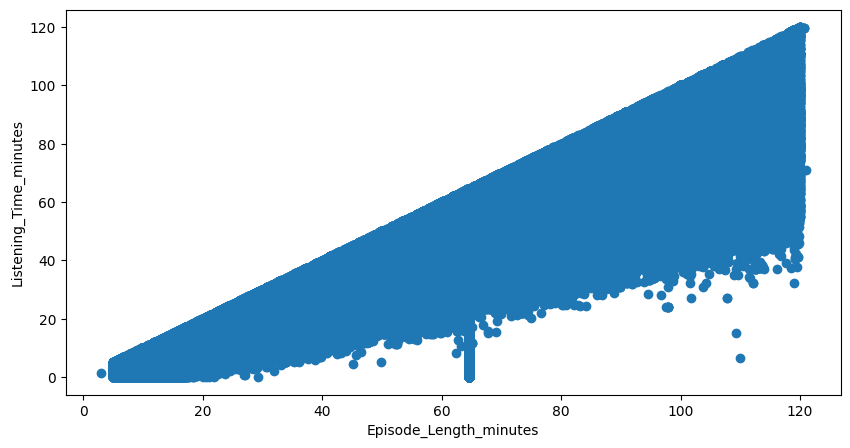

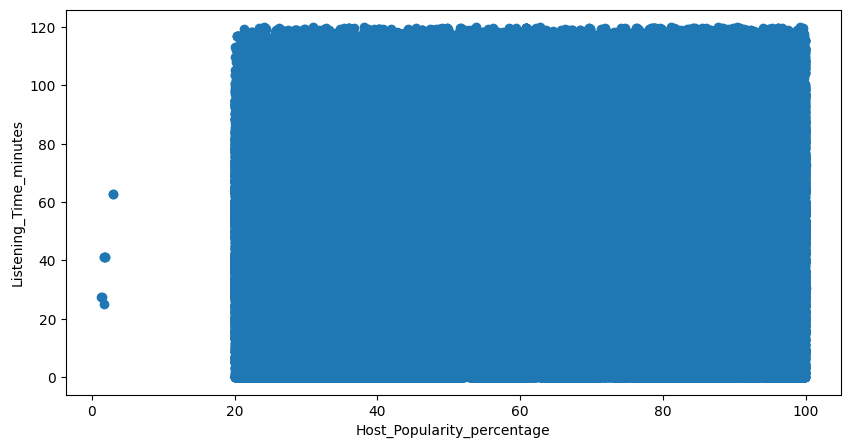

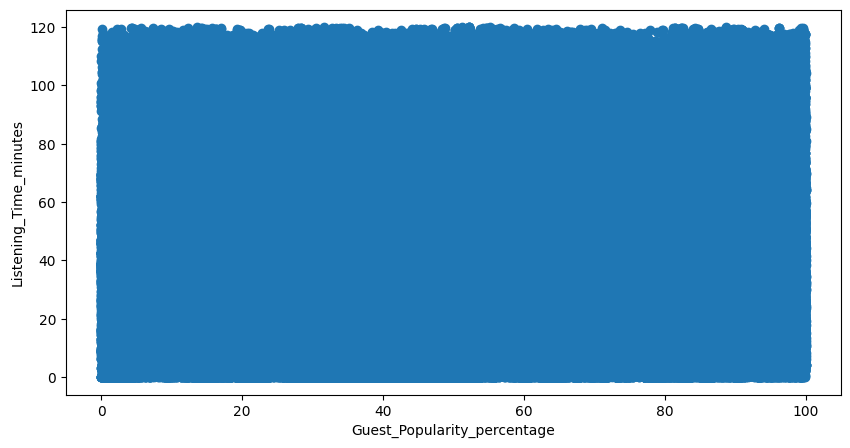

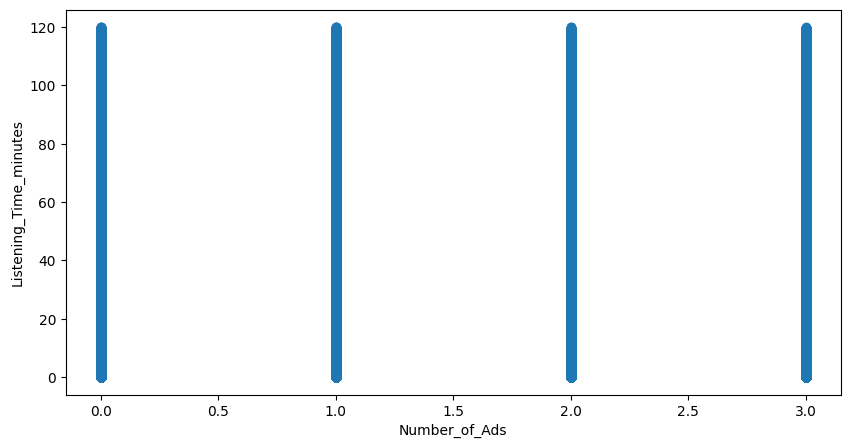

In [19]:
numlist=['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']

for col in numlist:
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(train[col], train['Listening_Time_minutes'])
    ax.set_xlabel(col)
    ax.set_ylabel('Listening_Time_minutes')
    plt.show()

In [20]:
id_col_test= test['id']
test.drop(['id'],axis = 1,inplace = True)

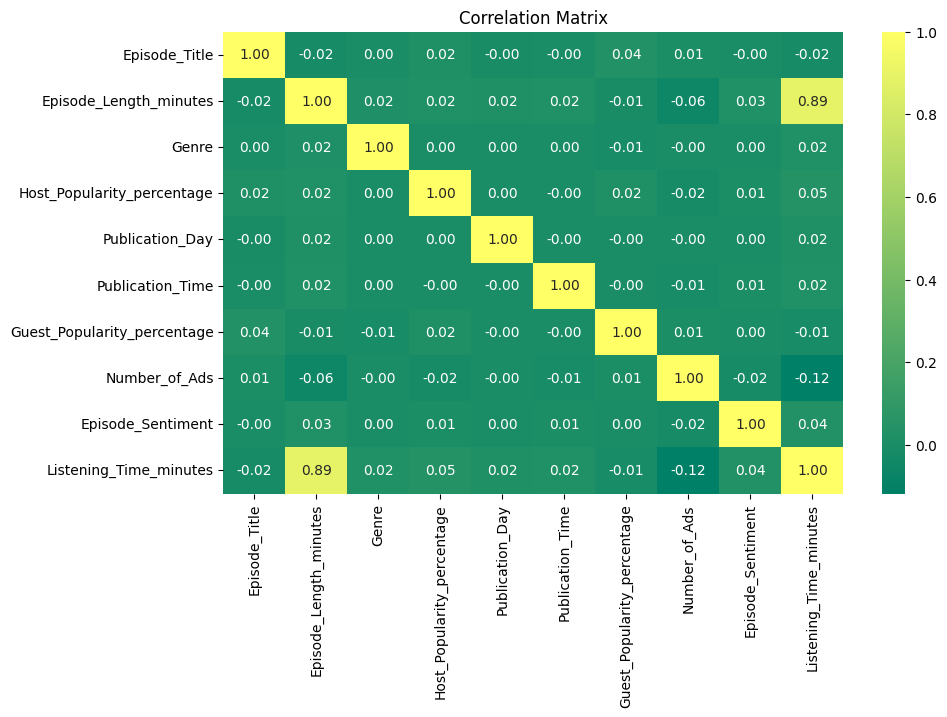

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='summer',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
import optuna

In [23]:
y = train['Listening_Time_minutes']
train = train.drop(['Listening_Time_minutes'],axis=1)
X = train

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=607)


def objective(trial):
    params={
        'colsample_bytree':trial.suggest_float('colsample_bytree',0,1),
        'n_estimators':trial.suggest_int('n_estimators', 100,1000),
        'learning_rate':trial.suggest_float('learning_rate', 0.01,0.1),
        'reg_lambda':trial.suggest_float('reg_lambda', 0,4),
        'reg_alpha':trial.suggest_float('reg_alpha', 0,4),
        'max_depth':trial.suggest_int('max_depth', 2,10),
        'gamma':trial.suggest_float('gamma', 0,1),
        'objective':'reg:squarederror',
        'eval_metric':'rmse',
    }
    
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

    return -score.mean()

In [25]:
study = optuna.create_study(direction='minimize',sampler=optuna.samplers.RandomSampler(seed=607))
optuna.logging.set_verbosity(optuna.logging.WARNING)

def log_best_trial(study, trial):
    if study.best_trial == trial:
        print(f"New best trial: {trial.number} with value: {trial.value} and params: {trial.params}")


study.optimize(objective, n_trials=8,n_jobs=-1,callbacks=[log_best_trial])

[I 2025-07-23 01:10:51,820] A new study created in memory with name: no-name-39da95a7-2312-4a94-84f4-d481052816a6


New best trial: 1 with value: 11.28278769963436 and params: {'colsample_bytree': 0.3678074279702851, 'n_estimators': 747, 'learning_rate': 0.05431843941828756, 'reg_lambda': 0.4450830037466029, 'reg_alpha': 0.17351292773087978, 'max_depth': 3, 'gamma': 0.16777289866027267}
New best trial: 3 with value: 11.225401441473831 and params: {'colsample_bytree': 0.3934739624992455, 'n_estimators': 976, 'learning_rate': 0.06159554910381244, 'reg_lambda': 1.6223350248974038, 'reg_alpha': 2.2359982042140283, 'max_depth': 4, 'gamma': 0.8140173376983701}
New best trial: 0 with value: 10.993172636303834 and params: {'colsample_bytree': 0.6923398720252928, 'n_estimators': 629, 'learning_rate': 0.07122080202692785, 'reg_lambda': 0.7611490851226264, 'reg_alpha': 1.905539150281244, 'max_depth': 10, 'gamma': 0.819766901154931}


In [26]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Score: {best_score:.6f}")

Best Hyperparameters: {'colsample_bytree': 0.6923398720252928, 'n_estimators': 629, 'learning_rate': 0.07122080202692785, 'reg_lambda': 0.7611490851226264, 'reg_alpha': 1.905539150281244, 'max_depth': 10, 'gamma': 0.819766901154931}
Best Score: 10.993173


In [27]:
best_xgb=XGBRegressor(**study.best_params)

eval_set = [(X_train, y_train), (X_test, y_test)]

best_xgb.fit(X_train,y_train,eval_set=eval_set,verbose=False)

y_pred = best_xgb.predict(X_test)

score=cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print(f'score: {score}')

score: [-11.00711414 -10.97302976 -11.02791346 -10.93023115 -11.02757468]


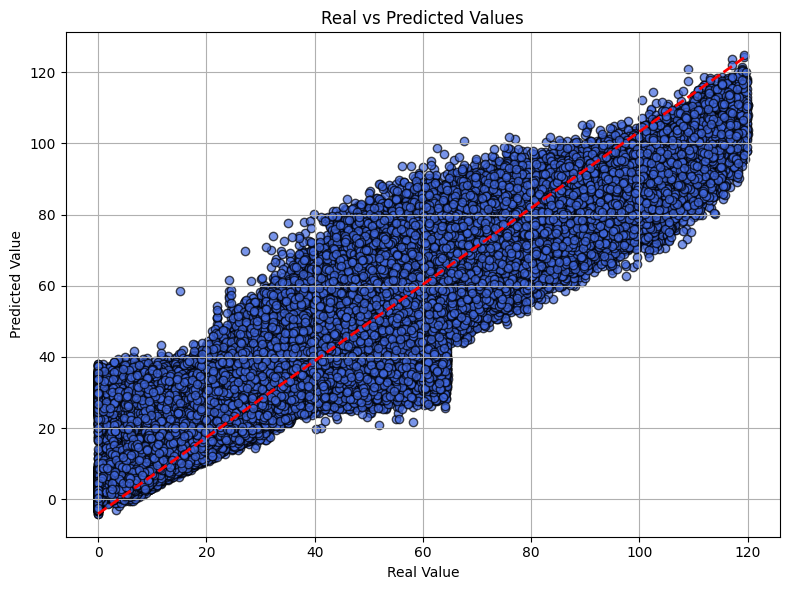

In [28]:
y_pred = best_xgb.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.7, color='royalblue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_pred.min(), y_pred.max()], 'r--', lw=2)
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.title("Real vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
X_df = X_train.copy() 

errors = np.abs(y_pred - y_train)

df_errors = pd.DataFrame({
    'Real': y_train,
    'Predicted': y_pred,
    'Error': errors
})

df_most_wrong = df_errors.sort_values(by='Error', ascending=False)

df_most_wrong

,Real,Predicted,Error
21562,15.10923,58.599648,43.490418
362616,35.00590,77.708168,42.702268
673357,27.21891,69.734161,42.515251
245550,32.31576,74.047127,41.731367
296955,39.93034,80.148750,40.218410
...,...,...,...
490463,36.40557,36.405510,0.000060
472676,40.18488,40.184929,0.000049
579576,41.33633,41.336308,0.000022
500736,64.40946,64.409439,0.000021


In [30]:
df_most_wrong.describe()

,Real,Predicted,Error
count,582577.000000,582577.000000,582577.000000
mean,44.500752,44.500813,6.916519
std,26.767312,24.557005,5.856582
min,0.000000,-4.086252,0.000002
25%,22.661500,25.634340,2.426160
50%,42.332660,40.912640,5.317997
75%,62.948870,64.820381,9.877884
max,119.970000,124.751137,43.490418


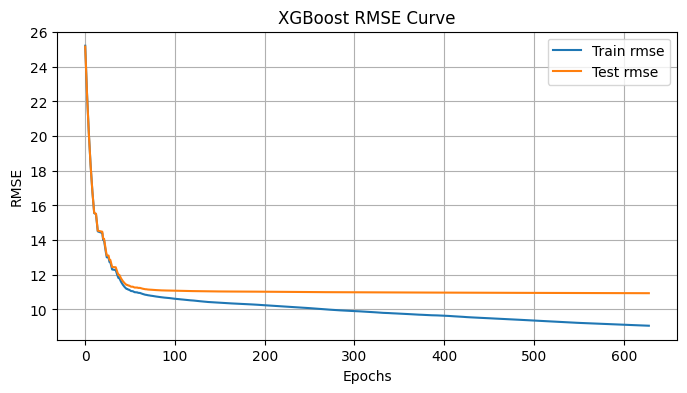

In [31]:
results = best_xgb.evals_result()

epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(8,4))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train rmse')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test rmse')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE Curve')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
x_test_df = test[X_train.columns]

y_test_pred = best_xgb.predict(x_test_df)

test['predicted'] = y_test_pred

print(test[['predicted']])

        predicted
0       53.597515
1       18.904968
2       49.307743
3       74.307655
4       47.799248
...           ...
249995  10.960106
249996  60.386162
249997   7.916816
249998  73.607933
249999  58.005383

[250000 rows x 1 columns]
